In [1]:
import re #Import RegEx
import os
import math
import numpy as np
import openpyxl
import pandas as pd
from pathlib import Path
from sklearn import preprocessing
import matplotlib.pyplot as plt 

In [2]:
training_dataset = pd.read_csv(r'C:\\Users\\George\\Desktop\\Research_UCLA\\CIC\\Computational Work\\Project-3\\intermediates\\training_set\\all_descriptor_data.csv')

In [3]:
training_dataset = training_dataset.drop('Unnamed: 0',axis=1)
training_dataset


,Name,A-M-B Angle,M-A Distance,M-B Distance,Metal_NBO,A_NBO,B_NBO,HOMO_LUMO,A-B_NBO,MA_MB_Difference,...,SW,NW,NE,SE,N_AVG,S_AVG,%Filled_x,%Filled_y,Nonalt,Weighted %Filled
0,pcpo-2,88,2.466366,2.085395,0.36341,1.00967,-1.03087,0.16681,2.04054,0.380971,...,30.7,51.8,49.9,40.3,50.90,35.50,0.281690,1.135847,0.0,0.889322
1,p-p-4,101,2.409900,2.259592,0.05510,1.03061,1.20281,0.15838,-0.17220,0.150308,...,49.8,53.6,50.2,44.8,51.90,47.30,0.000000,0.000000,0.0,1.730567
2,pcpo-1,87,2.464593,2.096961,0.34885,1.01294,-1.02739,0.16808,2.04033,0.367632,...,29.1,47.6,48.4,42.1,48.00,35.60,0.000000,0.000000,0.0,0.488679
3,pcpo-3,84,2.451567,2.074000,0.36066,1.01113,-1.02931,0.16656,2.04044,0.377567,...,35.8,55.6,46.0,41.4,50.80,38.60,0.739437,1.862790,0.0,0.936342
4,phen,79,2.176816,2.070952,0.48142,-0.42549,-0.39179,0.16749,-0.03370,0.105864,...,34.5,34.1,31.8,31.8,33.00,33.20,0.000000,0.000000,0.0,0.392309
5,pnpo-4,84,2.426323,2.080941,0.38348,1.23644,-1.03467,0.13580,2.27111,0.345382,...,40.8,32.7,42.9,61.9,37.80,51.40,9.647887,12.358019,1.0,2.101670
6,pnpo-2,85,2.434560,2.096659,0.41749,1.19828,-1.04353,0.13206,2.24181,0.337901,...,48.1,54.8,74.7,41.8,64.75,44.95,22.605634,22.080872,1.0,4.567578
7,pnpo-3,83,2.437832,2.081439,0.38848,1.23563,-1.02976,0.15825,2.26539,0.356393,...,47.4,33.0,43.8,67.6,38.40,57.50,9.049296,10.904134,1.0,2.488309
8,p-p-3,92,2.435174,2.291496,0.14977,1.01339,1.19595,0.16777,-0.18256,0.143678,...,56.1,69.2,52.6,48.6,60.90,52.40,14.894366,16.310768,0.0,3.983969
9,pnpo-5,86,2.477941,2.104294,0.40215,1.20030,-1.03018,0.16639,2.23048,0.373647,...,47.1,41.6,43.8,63.4,42.70,55.25,9.471831,10.631531,1.0,2.012393


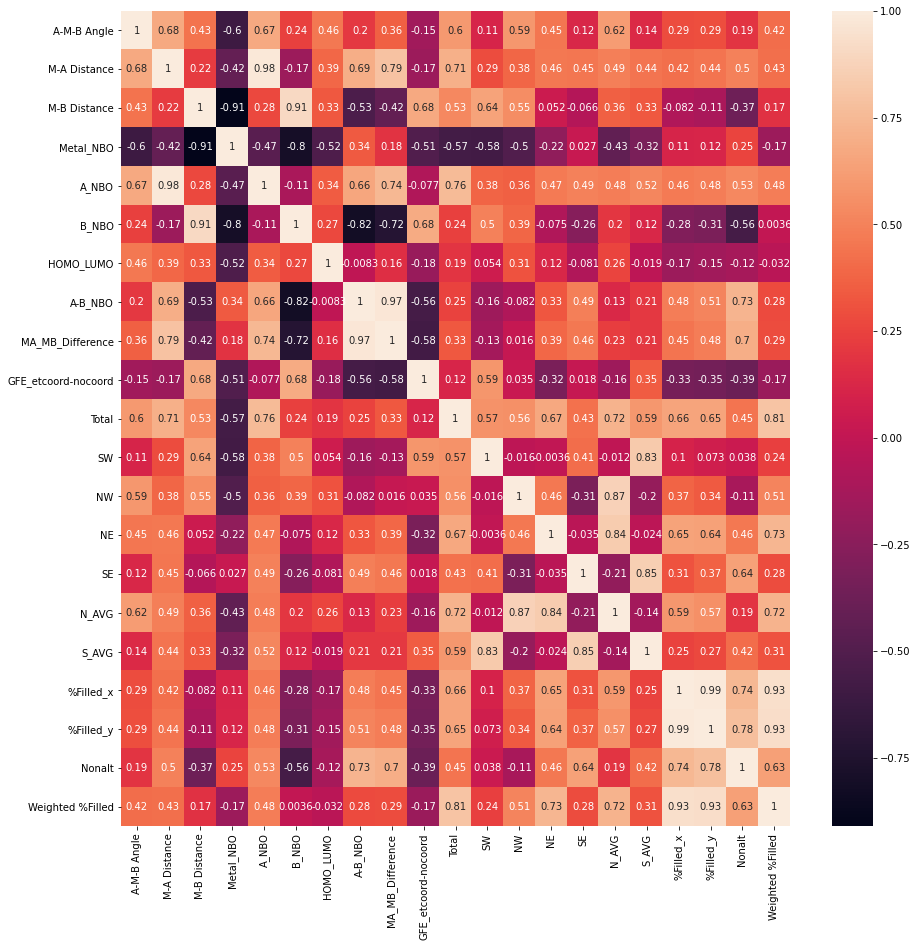

In [4]:
# Examining Collinearity

name_df = training_dataset['Name']
x_df = training_dataset.drop(['Name'],axis=1)
import seaborn as sns
import matplotlib as mpl


mpl.pyplot.figure(figsize = (15,15))
sns.heatmap(x_df.corr(),annot=True)
plt.savefig('descriptor_correlation_plot.png',dpi=600)

### Multicollinearity observed for

Multicollinearity definition: correlation coefficient more than 0.8 or lower than -0.8

A-B_NBO & MA-MB_Difference - 0.97 Remove MA-MB_Difference

Metal_NBO & B_NBO - -0.8

Metal_NBO & M-B Distance = -0.91 Remove M-B Distance

A_NBO & M-A Distance = 0.98 Remove M-A Distnace

B_NBO & M-B Distance = 0.91 Remove M-B Distance

A-B_NBO & B_NBO = -0.82 Remove B_NBO

N (AVG) & NW, NE = 0.87, 0.84 Remove N (AVG), keep NW and NE
S (AVG) & SW, SE = 0.83, 0.85 Remove S (AVG), keep SW and SE

%Filled_x & %Filled_y = 0.99 Remove %Filled_x
Weighted %Filled & Filled_x/Filled_y = 0.93 Remove Weighted %Filled 


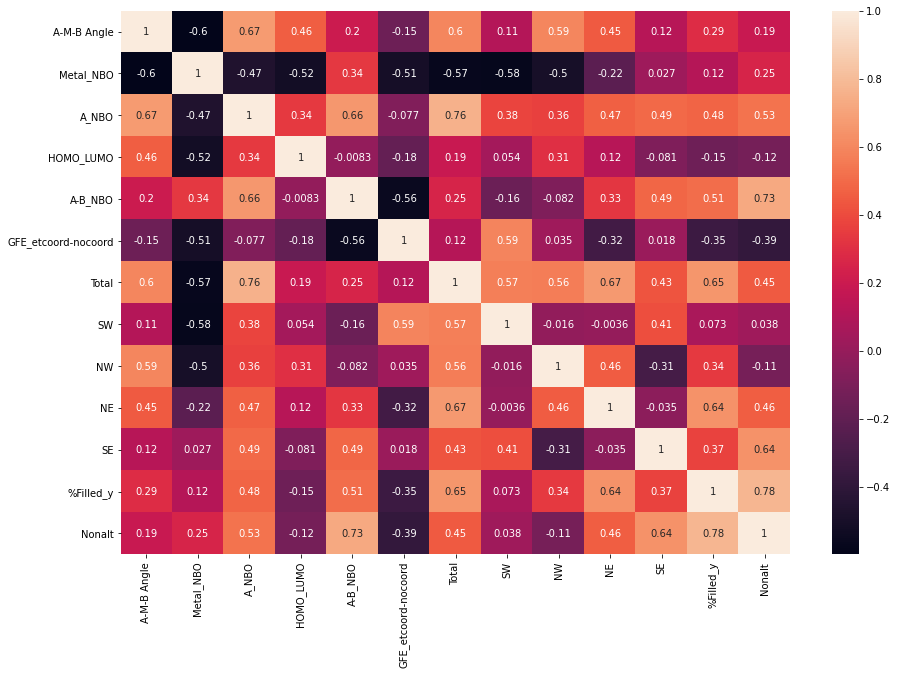

In [5]:
x_df = x_df.drop(['M-A Distance',
                  'MA_MB_Difference',
                  'B_NBO',
                  'M-B Distance',
                  'N_AVG',
                  'S_AVG',
                  '%Filled_x',
                  'Weighted %Filled'],axis=1)

mpl.pyplot.figure(figsize = (15,10))
sns.heatmap(x_df.corr(),annot=True)
plt.savefig('descriptor_correlation_plot_multicollinearity.png',dpi=600)
# sns_plot.savefig("descriptor_correlation_plot.png")

In [6]:
# Scale data 

x_df

float_array = x_df.values.astype(float)

min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)


# N_Systems, N_Columns = x_df.shape 
# N_Descriptors = N_Columns - 2

# array = x_df.values
# X_Original = array[:, 1:N_Descriptors] 
# y_Original = array[:,1]

x_df

,A-M-B Angle,Metal_NBO,A_NBO,HOMO_LUMO,A-B_NBO,GFE_etcoord-nocoord,Total,SW,NW,NE,SE,%Filled_y,Nonalt
0,88,0.36341,1.00967,0.16681,2.04054,0.834079,43.2,30.7,51.8,49.9,40.3,1.135847,0.0
1,101,0.05510,1.03061,0.15838,-0.17220,11.390731,49.6,49.8,53.6,50.2,44.8,0.000000,0.0
2,87,0.34885,1.01294,0.16808,2.04033,0.638845,41.8,29.1,47.6,48.4,42.1,0.000000,0.0
3,84,0.36066,1.01113,0.16656,2.04044,3.168455,44.7,35.8,55.6,46.0,41.4,1.862790,0.0
4,79,0.48142,-0.42549,0.16749,-0.03370,5.359425,33.1,34.5,34.1,31.8,31.8,0.000000,0.0
5,84,0.38348,1.23644,0.13580,2.27111,10.140733,44.6,40.8,32.7,42.9,61.9,12.358019,1.0
6,85,0.41749,1.19828,0.13206,2.24181,5.237504,54.9,48.1,54.8,74.7,41.8,22.080872,1.0
7,83,0.38848,1.23563,0.15825,2.26539,4.306639,47.9,47.4,33.0,43.8,67.6,10.904134,1.0
8,92,0.14977,1.01339,0.16777,-0.18256,6.757949,56.6,56.1,69.2,52.6,48.6,16.310768,0.0
9,86,0.40215,1.20030,0.16639,2.23048,4.043917,49.0,47.1,41.6,43.8,63.4,10.631531,1.0


In [7]:
df_normalized = pd.DataFrame(scaled_array)
df_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.458333,0.736225,0.864505,0.735450,0.906404,0.340981,0.429787,0.057971,0.586698,0.421911,0.237430,0.051440,0.0
1,1.000000,0.075750,0.877017,0.557037,0.008184,0.848486,0.702128,0.750000,0.629454,0.428904,0.363128,0.000000,0.0
2,0.416667,0.705034,0.866459,0.762328,0.906319,0.331595,0.370213,0.000000,0.486936,0.386946,0.287709,0.000000,0.0
3,0.291667,0.730334,0.865377,0.730159,0.906364,0.453205,0.493617,0.242754,0.676960,0.331002,0.268156,0.084362,0.0
4,0.083333,0.989032,0.006997,0.749841,0.064405,0.558535,0.000000,0.195652,0.166271,0.000000,0.000000,0.000000,0.0
5,0.291667,0.779220,1.000000,0.079153,1.000000,0.788393,0.489362,0.423913,0.133017,0.258741,0.840782,0.559671,1.0
6,0.333333,0.852078,0.977199,0.000000,0.988106,0.552673,0.927660,0.688406,0.657957,1.000000,0.279330,1.000000,1.0
7,0.250000,0.789931,0.999516,0.554286,0.997678,0.507923,0.629787,0.663043,0.140143,0.279720,1.000000,0.493827,1.0
8,0.625000,0.278556,0.866728,0.755767,0.003978,0.625768,1.000000,0.978261,1.000000,0.484848,0.469274,0.738683,0.0
9,0.375000,0.819216,0.978406,0.726561,0.983507,0.495292,0.676596,0.652174,0.344418,0.279720,0.882682,0.481481,1.0


In [8]:
# Test performance with different classifiers
# Use features that are above 0.60 as a preliminary test
from sklearn import preprocessing

x_filter_df = x_df[['A-B_NBO','%Filled_y','Nonalt']]

x_filter_df

N_Systems, N_Columns = x_filter_df.shape 
N_Descriptors = N_Columns - 1
array = x_filter_df.values
X_all = array[:, :N_Descriptors] 

# Scale all dataset to mean 0 stdev 1
scaler = preprocessing.StandardScaler().fit(X_all)

print('Mean:', scaler.mean_)                       #Standardize virtual dataset based on the mean and std of this training dataset
print('Variance:', scaler.var_)

X_all = scaler.transform(X_all)
y_all = array[:, N_Descriptors]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.75, random_state=1234)

X_all.shape


Mean: [1.2828156  7.24398001]
Variance: [ 1.08937746 49.06845325]


(25, 2)

In [9]:
# Obtain virtual candidate dataset and standardize it with the mean and std calculated above


#Import dataset
candidate_dataset = pd.read_csv(r'C:\\Users\\George\\Desktop\\Research_UCLA\\CIC\\Computational Work\\Project-3\\intermediates\\virtual_candidates\\all_descriptor_data_virtual.csv')
candidate_dataset = candidate_dataset.drop('Unnamed: 0',axis=1)

candidate_name = candidate_dataset['Name']

candidate_dataset_df = candidate_dataset.drop(['Name'],axis=1)


#Obtain selected columns
candidate_dataset_filter_df = candidate_dataset_df[['A-B_NBO','%Filled_y']]
N_Systems, N_Columns = candidate_dataset_filter_df.shape 
array = candidate_dataset_filter_df.values
candidate_dataset_all = array[:, :N_Columns] 

#Standardize dataset

train_mean = np.tile(scaler.mean_, (candidate_dataset_all.shape[0], 1))
std_candidate_array = candidate_dataset_all-train_mean
train_variance = np.tile(scaler.var_, (candidate_dataset_all.shape[0], 1))
train_sd = np.sqrt(train_variance)
std_candidate_array =std_candidate_array / np.sqrt(train_variance)

type(std_candidate_array)
name_index = [12,46,47,15,20]
# for i in name_index:
#     print(candidate_name[i], std_candidate_array[i])
std_candidate_array[name_index] #Use this for teseted candidates only


array([[ 0.74069211,  1.67702722],
       [ 0.41245665, -1.0341322 ],
       [ 0.72164508,  0.32793354],
       [ 0.7776077 ,  0.3668497 ],
       [ 0.72191335, -1.0341322 ]])

In [10]:
# Construct hyperparateter optimization for each classifier

#Import packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from skopt import BayesSearchCV


#Label classifiers
KNN = KNeighborsClassifier()
SVM = SVC(probability=True)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
LR = LogisticRegression()
VC = VotingClassifier(estimators =[('DT', DT),('KNN',KNN),('SVM',SVM),('RF',RF),('LR',LR)],voting='soft', weights = [1,1,1,1,1])

# Set names of classifier
classifier_list = [KNN,SVM,DT,RF,LR,VC]
classifier_name_list = ['KNN','SVM','DT','RF','LR','VC']

# List of dictionary for each classifier
parameter_list = [{"metric": ["euclidean", "cityblock"],'n_neighbors': (2, 7),},
                  {""}
                  ]


#KNN Optimization
#parameter grid
param_grid = {
    "metric": ["euclidean", "cityblock"],
    'n_neighbors': (2, 7),
}

# set up our optimiser to find the best params in 30 searches
opt = BayesSearchCV(
    KNN,
    param_grid,
    n_iter=32,            # How many points to sample
    cv = 2            # Number of cross-validation folds
   )

opt.fit(X_train, y_train)

print('Best params for KNN achieve a test score of', opt.score(X_test, y_test), ':')
print(opt.best_estimator_)


# SVM Optimization
# Parameter Grid
param_grid = {
    "C": [0.1,1,10,100,1000],
    'kernel': ["linear","poly","rbf","sigmoid"],
    "degree":(2,5),
    "gamma" : [1,0.1,0.01,0.001,0.0001]
    
}

# set up our optimiser to find the best params in 30 searches
opt = BayesSearchCV(
    SVM,
    param_grid,
    n_iter=32,            # How many points to sample
    cv = 2            # Number of cross-validation folds
   )

opt.fit(X_train, y_train)

print('Best params for SVM achieve a test score of', opt.score(X_test, y_test), ':')
print(opt.best_estimator_)


# DT Optimization
# Parameter Grid
param_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth': (1,20),
    'min_samples_split' : (2, 10),
    'max_leaf_nodes': (2,20)
}

# set up our optimiser to find the best params in 30 searches
opt = BayesSearchCV(
    DT,
    param_grid,
    n_iter=32,            # How many points to sample
    cv = 2            # Number of cross-validation folds
   )

opt.fit(X_train, y_train)

print('Best params for DT achieve a test score of', opt.score(X_test, y_test), ':')
print(opt.best_estimator_)

# RF Optimization
# Parameter Grid
param_grid = {
    'n_estimators': (100, 500),           # Specify integer-values parameters like this
    'criterion': ['gini', 'entropy'],     # Specify categorical parameters as here
    'max_depth': (4, 100),                # integer valued parameter
    'min_weight_fraction_leaf' : (0,0.5, 'uniform') , 
    'max_leaf_nodes' : (2, 100)
}

# set up our optimiser to find the best params in 30 searches
opt = BayesSearchCV(
   RF,
    param_grid,
    n_iter=32,            # How many points to sample
    cv = 2            # Number of cross-validation folds
   )

opt.fit(X_train, y_train)

print('Best params for RF achieve a test score of', opt.score(X_test, y_test), ':')
print(opt.best_estimator_)

# LR Optimization
# Parameter Grid
param_grid = {
    'solver': ['liblinear', 'saga'],  
    'penalty': ['l1','l2'],
    'tol': (1e-5, 1e-3, 'log-uniform'),
    'C': (1e-5, 1.0, 'log-uniform'),
    'fit_intercept': [True, False]
}

# set up our optimiser to find the best params in 30 searches
opt = BayesSearchCV(
   LR,
    param_grid,
    n_iter=32,            # How many points to sample
    cv = 2            # Number of cross-validation folds
   )

opt.fit(X_train, y_train)

print('Best params for LR achieve a test score of', opt.score(X_test, y_test), ':')
print(opt.best_estimator_)


C:\Users\George\.conda\envs\chem2\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\George\.conda\envs\chem2\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\George\.conda\envs\chem2\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\George\.conda\envs\chem2\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\George\.conda\envs\chem2\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The o

Best params for KNN achieve a test score of 0.7142857142857143 :
KNeighborsClassifier(metric='euclidean', n_neighbors=6)


C:\Users\George\.conda\envs\chem2\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\George\.conda\envs\chem2\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\George\.conda\envs\chem2\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\George\.conda\envs\chem2\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\George\.conda\envs\chem2\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The o

Best params for SVM achieve a test score of 1.0 :
SVC(C=10.0, degree=5, gamma=0.1, kernel='linear', probability=True)


C:\Users\George\.conda\envs\chem2\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\George\.conda\envs\chem2\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best params for DT achieve a test score of 1.0 :
DecisionTreeClassifier(criterion='entropy', max_depth=18, max_leaf_nodes=4,
                       min_samples_split=8)
Best params for RF achieve a test score of 1.0 :
RandomForestClassifier(criterion='entropy', max_depth=52, max_leaf_nodes=37,
                       min_weight_fraction_leaf=0, n_estimators=419)


C:\Users\George\.conda\envs\chem2\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best params for LR achieve a test score of 0.8571428571428571 :
LogisticRegression(C=0.2581105199200161, solver='saga',
                   tol=4.732744934804785e-05)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
KNN = KNeighborsClassifier(metric='euclidean', n_neighbors=6)
SVM = SVC(C=1000.0, degree=5, gamma=0.1, kernel='linear', probability=True)
DT = DecisionTreeClassifier(criterion='entropy', max_depth=18, max_leaf_nodes=4, min_samples_split=8)
RF = RandomForestClassifier(max_depth=52, max_leaf_nodes=37,min_weight_fraction_leaf=0, n_estimators=419)
LR = LogisticRegression(C=0.2581105199200161, solver='saga',tol=4.732744934804785e-05)
VC = VotingClassifier(estimators =[('DT', DT),('KNN',KNN),('SVM',SVM),('RF',RF),('LR',LR)],voting='soft', weights = [1,1,1,1,1])


classifier_list = [KNN,SVM,DT,RF,LR,VC]
classifier_name_list = ['KNN','SVM','DT','RF','LR','VC']

for (classifier,classifier_name) in zip(classifier_list,classifier_name_list):
    
    classifier.fit(X_train,y_train)

    y_predict = classifier.predict(X_test)
    print(classifier, classification_report(y_test, y_predict)) 



    scores = cross_val_score(classifier,X_train,y_train,cv=LeaveOneOut())
    print(classifier, 'Cross Validation Mean Score = %.2f' % np.mean(scores))
    
        # Plotting decision regions
    scatter_highlight_kwargs = {'s': 120, 'label': 'Tested Candidates', 'alpha': 0.7}


    ax = plot_decision_regions(X_all, 
                               y_all.astype(np.int_),
                               clf=classifier, 
                               legend=2, 
                               X_highlight=std_candidate_array[name_index],
                               scatter_highlight_kwargs = scatter_highlight_kwargs)

    # Adding axes annotations
    plt.xlabel('A-B_NBO')
    plt.ylabel('%Filled_y')
    plt.title(classifier_name,weight='bold')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, 
              ['Alternating', 'Non-alternating','Tested Candidates'], 
               framealpha=0.3, scatterpoints=1)
    
    plt.savefig(classifier_name+".png", dpi=600)
    plt.savefig(classifier_name+".eps",format='eps')
    plt.clf()

KNeighborsClassifier(metric='euclidean', n_neighbors=6)               precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.60      1.00      0.75         3

    accuracy                           0.71         7
   macro avg       0.80      0.75      0.71         7
weighted avg       0.83      0.71      0.70         7

KNeighborsClassifier(metric='euclidean', n_neighbors=6) Cross Validation Mean Score = 0.83


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

SVC(C=1000.0, degree=5, gamma=0.1, kernel='linear', probability=True)               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

SVC(C=1000.0, degree=5, gamma=0.1, kernel='linear', probability=True) Cross Validation Mean Score = 0.94


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

DecisionTreeClassifier(criterion='entropy', max_depth=18, max_leaf_nodes=4,
                       min_samples_split=8)               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

DecisionTreeClassifier(criterion='entropy', max_depth=18, max_leaf_nodes=4,
                       min_samples_split=8) Cross Validation Mean Score = 0.94


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

RandomForestClassifier(max_depth=52, max_leaf_nodes=37,
                       min_weight_fraction_leaf=0, n_estimators=419)               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

RandomForestClassifier(max_depth=52, max_leaf_nodes=37,
                       min_weight_fraction_leaf=0, n_estimators=419) Cross Validation Mean Score = 0.94


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

LogisticRegression(C=0.2581105199200161, solver='saga',
                   tol=4.732744934804785e-05)               precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         4
         1.0       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7

LogisticRegression(C=0.2581105199200161, solver='saga',
                   tol=4.732744934804785e-05) Cross Validation Mean Score = 0.83


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=18,
                                                     max_leaf_nodes=4,
                                                     min_samples_split=8)),
                             ('KNN',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=6)),
                             ('SVM',
                              SVC(C=1000.0, degree=5, gamma=0.1,
                                  kernel='linear', probability=True)),
                             ('RF',
                              RandomForestClassifier(max_depth=52,
                                                     max_leaf_nodes=37,
                                                     min_weight_fraction_leaf=0,
                                                     n_estimators=419))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<Figure size 432x288 with 0 Axes>

In [27]:
std_training_df = pd.DataFrame(X_all, columns = ['A-B_NBO','%Filled_y'])
std_training_df['Name'] = name_df
std_training_df

,A-B_NBO,%Filled_y,Name
0,0.725976,-0.871982,pcpo-2
1,-1.394050,-1.034132,p-p-4
2,0.725774,-1.034132,pcpo-1
3,0.725880,-0.768205,pcpo-3
4,-1.261353,-1.034132,phen
5,0.946885,0.730067,pnpo-4
6,0.918812,2.118077,pnpo-2
7,0.941404,0.522514,pnpo-3
8,-1.403976,1.294352,p-p-3
9,0.907957,0.483598,pnpo-5


In [28]:
std_candidates_df = pd.DataFrame(std_candidate_array, columns = ['A-B_NBO','%Filled_y'])

std_candidates_df['Name'] = candidate_name
std_candidates_df

,A-B_NBO,%Filled_y,Name
0,0.706383,-1.034132,p-o-35
1,0.737262,-1.014674,p-o-34
2,0.730124,1.015452,p-o-33
3,0.740481,1.073827,p-o-32
4,0.699455,1.112743,p-o-28
5,0.743231,1.372184,p-o-30
6,0.759059,0.327934,p-o-29
7,0.722517,-0.599568,p-o-36
8,0.734072,-1.034132,p-o-27
9,0.761789,-1.034132,p-o-26


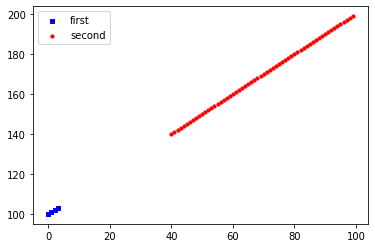

In [29]:
import matplotlib.pyplot as plt

x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x[:4], y[:4], s=10, c='b', marker="s", label='first')
ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

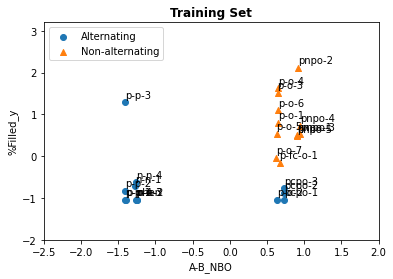

In [30]:


nonalt_list_df = pd.read_csv(r'C:\\Users\\George\\Desktop\\Research_UCLA\\CIC\\Computational Work\\Project-3\\intermediates\\training_set\\nonalt_list.csv',
                            names=['Name'])
nonalt_list = nonalt_list_df['Name'].tolist()

nonalt_training_df = std_training_df[std_training_df["Name"].isin(nonalt_list)]

alt_training_df = std_training_df[std_training_df["Name"].isin(nonalt_list) == False]

x_nonalt = nonalt_training_df["A-B_NBO"].tolist()
y_nonalt = nonalt_training_df["%Filled_y"].tolist()
n_nonalt = nonalt_training_df["Name"]

x_alt = alt_training_df["A-B_NBO"].tolist()
y_alt = alt_training_df["%Filled_y"].tolist()
n_alt = alt_training_df["Name"]

fig = plt.figure()
fig, ax = plt.subplots()
ax.scatter(x_alt, y_alt, label='Alternating')
for i, txt in enumerate(n_alt):
    ax.annotate(txt, (x_alt[i], y_alt[i]+0.1))
ax.scatter(x_nonalt, y_nonalt, label='Non-alternating',marker = "^")
for i, txt in enumerate(n_nonalt):
    ax.annotate(txt, (x_nonalt[i], y_nonalt[i]+0.1))
ax.set_xlabel('A-B_NBO')
ax.set_ylabel('%Filled_y')
ax.set_xlim(-2.5,2)
ax.set_ylim(-2,3.2)
ax.set_title("Training Set",weight='bold')
ax.legend(loc='upper left')

plt.savefig("Training_Set.png", dpi=600)
plt.savefig("Training_Set.eps",format='eps')
# plt.clf()



# plt.scatter(x,y)
# plt.xlim(-2.5,2)
# plt.ylim(-2,3.2)
# plt.xlabel('A-B_NBO')
# plt.ylabel('%Filled_y')
# plt.title("Training Set")
# for i, txt in enumerate(n):
#     plt.annotate(txt, (x[i], y[i]))
# plt.savefig("Training_Set.png", dpi=600)
# plt.clf()

0 p-o-35
1 p-o-34
2 p-o-33
3 p-o-32
4 p-o-28
5 p-o-30
6 p-o-29
7 p-o-36
8 p-o-27
9 p-o-26
10 p-o-31
11 p-o-37
12 p-o-41
13 p-o-39
14 p-o-40
15 p-o-42
16 p-o-43
17 p-o-44
18 p-o-45
19 p-o-8
20 p-o-9
21 p-o-25
22 p-o-38
23 p-o-24
24 c-o-2
25 p-o-22
26 c-n-1
27 c-n-2
28 c-n-3
29 c-o-1
30 p-o-23
31 c-o-4
32 c-o-5
33 c-o-6
34 c-o-7
35 c-o-8
36 c-p-1
37 c-o-3
38 p-o-10
39 c-s-1
40 p-o-21
41 p-o-20
42 p-o-19
43 p-o-17
44 p-o-18
45 p-o-15
46 p-o-14
47 p-o-13
48 p-o-12
49 p-o-11
50 p-o-16


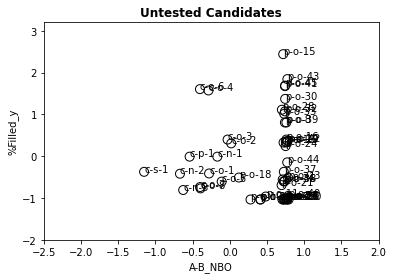

In [31]:
x = std_candidates_df["A-B_NBO"]
y = std_candidates_df["%Filled_y"]
n = std_candidates_df["Name"]


plt.scatter(x,y, s=80, facecolors='none', edgecolors='black')
plt.xlim(-2.5,2)
plt.ylim(-2,3.2)
plt.xlabel('A-B_NBO')
plt.ylabel('%Filled_y')
plt.title("Untested Candidates",weight='bold')
for i, txt in enumerate(n):
    print(i, txt)
    plt.annotate(txt, (x[i], y[i]))
plt.savefig("Untested_Candidates.png", dpi=600)
plt.savefig("Untested_Candidates.eps",format='eps')
# plt.clf()

In [40]:
# candidates tested in paper



test_names = ["p-o-9","p-o-13","p-o-14","p-o-41","p-o-42"]

tested_candidates_df = std_candidates_df[std_candidates_df["Name"].isin(test_names)]
tested_candidates_df = tested_candidates_df.reset_index()
x = tested_candidates_df["A-B_NBO"]
y = tested_candidates_df["%Filled_y"]
n = tested_candidates_df["Name"]
n = ['2','3','4','5','1']
print(n)

plt.scatter(x,y, s=80, facecolors='none', edgecolors='black')
plt.xlim(-2.5,2)
plt.ylim(-2,3.2)
plt.xlabel('A-B_NBO')
plt.ylabel('%Filled_y')
plt.title("Tested Candidates",weight='bold')
for i, txt in enumerate(n):
    print(i, txt)
    plt.annotate(txt, (x[i], y[i]+0.25),weight='bold')
plt.savefig("Tested_Candidates.png", dpi=600)
plt.savefig("Tested_Candidates.eps",format='eps')

plt.clf()


['2', '3', '4', '5', '1']
0 2
1 3
2 4
3 5
4 1


<Figure size 432x288 with 0 Axes>

In [36]:
tested_candidates_df

,index,A-B_NBO,%Filled_y,Name
0,12,0.740692,1.677027,p-o-41
1,15,0.777608,0.366850,p-o-42
2,20,0.721913,-1.034132,p-o-9
3,46,0.412457,-1.034132,p-o-14
4,47,0.721645,0.327934,p-o-13


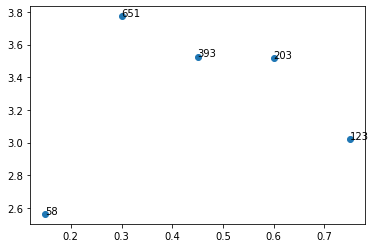

In [33]:
import matplotlib.pyplot as plt
y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
z = [0.15, 0.3, 0.45, 0.6, 0.75]
n = [58, 651, 393, 203, 123]

fig, ax = plt.subplots()
ax.scatter(z, y)





for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))